In [ ]:
import tensorflow as tf

In [ ]:
print('Tensorflow Version: {}'.format(tf.__version__))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(train_image, train_lable), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
plt.imshow(train_image[0])

In [ ]:
train_image = train_image/255
test_image = test_image/255

In [ ]:
train_label_onehot = tf.keras.utils.to_categorical(train_lable)

In [ ]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # 28*28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000029C8170FD90>>

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [22]:
history = model.fit(train_image, train_label_onehot, 
                    epochs=10, 
                    validation_data=(test_image, test_label_onehot))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4907 - acc: 0.8230 - val_loss: 0.4326 - val_acc: 0.8424
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3673 - acc: 0.8648 - val_loss: 0.3971 - val_acc: 0.8612
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3357 - acc: 0.8768 - val_loss: 0.3588 - val_acc: 0.8702
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3084 - acc: 0.8852 - val_loss: 0.3617 - val_acc: 0.8675
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2923 - acc: 0.8914 - val_loss: 0.3411 - val_acc: 0.8770
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2738 - acc: 0.8967 - val_loss: 0.3419 - val_acc: 0.8746
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2637 - acc: 0.9007 - val_loss: 0.3621 - val_acc: 0.8668
Epoch 8/10
1875/1875 [==============================] - 6s 3ms

In [23]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

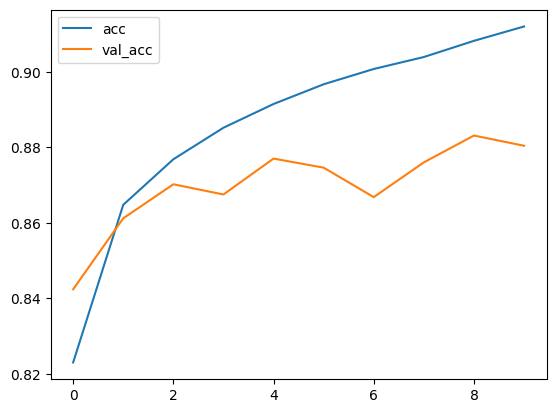

In [24]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

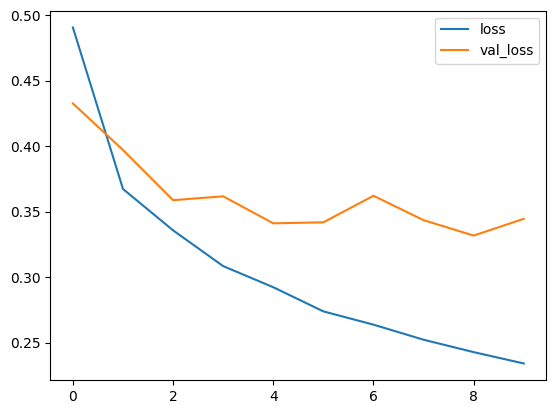

In [25]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

##### 过拟合： 在训练数据集上得分很高，在测试数据上得分相对比较低

##### 欠拟合：在训练数据集上得分比较低，在测试数据上得分相对比较低